<a href="https://colab.research.google.com/github/nikenaml/image-classification-using-deep-learning-pretrained-model/blob/master/image-classification-using-pretrained-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Nama     : Niken Amelia
    Email    : niken.aml99@gmail.com
    No. HP   : 085311321124
    LinkedIn : https://www.linkedin.com/in/nikenamelia/
    Github   : https://github.com/nikenaml

# About Dataset
## Apparel images dataset

### Description

Context: This dataset have been created by the author to practice multi-label classification.

Content:

**The dataset consist of 11385 images** and includes next categories:

a. Dress
- black_dress: 450 - blue_dress: 502 - red_dress: 800 - white_dress: 818

b. Pants
- black_pants: 871 - blue_pants: 798 - brown_pants: 311 - green_pants: 227 - red_pants: 308 - white_pants: 274

c. Shirt
- black_shirt: 715 - blue_shirt: 741 - green_shirt: 230

d. Shoes
- black_shoes: 766 - blue_shoes: 523 - brown_shoes: 464 - green_shoes: 455 - red_shoes: 610 - white_shoes: 600

e. Shorts
- black_shorts: 328 - blue_shorts: 299 - brown_shorts: 40 - green_shorts: 135 - white_shorts: 120

---

**Link Dataset:**

https://www.kaggle.com/trolukovich/apparel-images-dataset

*In this case study, I combine several subcategories of the same clothing into one category (not by clothing color, but by clothing type). The result of merging these subcategories is that there are several main categories which are divided into 5 categories, namely Dress, Pants, Shirt, Shoes, Shorts. I'm trying to learn and build a deep learning approach with CNN Architecture using the pre-trained model "InceptionResNetV2" variant to fit the data and then used to predict the image data. And in the last part, the model will be saved in TF-LITE format for development purposes (such as mobile applications).*

# Download dataset from Kaggle

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "nikenamelia" # username from the json file
os.environ['KAGGLE_KEY'] = "d81f627b9699f95aa938e378544c3488" # key from the json file
# !pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
!kaggle datasets download -d trolukovich/apparel-images-dataset

 97% 241M/248M [00:10<00:00, 18.9MB/s]
100% 248M/248M [00:11<00:00, 23.6MB/s]


In [ ]:
#unzip
!mkdir dataset
!unzip apparel-images-dataset.zip -d dataset
!ls dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/brown_shoes/2e94cdf3e3020cad6ad91f01cf75264a270908c6.jpg  
  inflating: dataset/brown_shoes/2e9ec5a783dd8eb88af84a2fa01dd44ec0837e19.jpg  
  inflating: dataset/brown_shoes/2ee1746aacd7d31ab3a941934a11b9b34ae884bc.jpg  
  inflating: dataset/brown_shoes/2f098f41527b7ef3404c1df984f775d21b10df15.jpg  
  inflating: dataset/brown_shoes/2fbff880bb5d7c001b8993372107a9d06ac44a7f.jpg  
  inflating: dataset/brown_shoes/3034f61d1f09748763c3e1b0dadd915392b1278b.jpg  
  inflating: dataset/brown_shoes/30a1704559dec214b60e8bfad6826fdfadf1f87a.jpg  
  inflating: dataset/brown_shoes/30ef20bcb027c99409c81fd6127957502b0e693e.jpg  
  inflating: dataset/brown_shoes/312cf581fd4ec3678b8794f9f488aa1dad2f2908.jpg  
  inflating: dataset/brown_shoes/337a443bf71b424c5ff4bfa06bdfcc2a447f9535.jpg  
  inflating: dataset/brown_shoes/33a20d631a24cdd66b4a52d70029bd2037451a96.jpg  
  inflating: dataset/brown_shoes/343de6c46da4b0d867fed16827862cee5cb4

In [ ]:
os.makedirs('data/dataset')

# Data Preparation (Reduce and Join Data)

In [ ]:
# current folder path
current_folder = '/content/dataset/'

# list of folders to be merged
# list_dir = ['black_dress', 'blue_dress', 'red_dress', 'white_dress']
# list_dir = ['black_pants', 'blue_pants', 'brown_pants', 'green_pants', 'red_pants', 'white_pants']
# list_dir = ['black_shirt', 'blue_shirt', 'green_shirt']
# list_dir = ['black_shoes', 'blue_shoes', 'brown_shoes', 'green_shoes', 'red_shoes', 'white_shoes']
list_dir = ['black_shorts', 'blue_shorts', 'brown_shorts', 'green_shorts', 'white_shorts']
  
# enumerate on list_dir to get the 
# content of all the folders ans store it in a dictionary
content_list = {}
for index, val in enumerate(list_dir):
    path = os.path.join(current_folder, val)
    content_list[ list_dir[index] ] = os.listdir(path)

In [ ]:
# Function to create new folder if not exists
def make_new_folder(folder_name, parent_folder_path):
      
    # Path
    path = os.path.join(parent_folder_path, folder_name)
      
    # Create the folder
    # 'new_folder' in
    # parent_folder
    try: 
        
        # mode of the folder
        mode = 0o777
  
        # Create folder
        os.mkdir(path, mode) 
          
    except OSError as error: 
        print(error)
  
# folder in which all the content 
# will be merged
# merge_folder = "/content/data/dataset/dress"
# merge_folder = "/content/data/dataset/pants"
# merge_folder = "/content/data/dataset/shirt"
# merge_folder = "/content/data/dataset/shoes"
merge_folder = "/content/data/dataset/shorts"
  
# merge_folder path - current_folder 
# + merge_folder
merge_folder_path = os.path.join(current_folder, merge_folder) 
  
# create merge_folder if not exists
make_new_folder(merge_folder, current_folder)

In [ ]:
# import package
import shutil
import os

# loop through the list of folders
for sub_dir in content_list:
  
    # loop through the contents of the
    # list of folders
    for contents in content_list[sub_dir]:
  
        # make the path of the content to move 
        path_to_content = sub_dir + "/" + contents  
  
        # make the path with the current folder
        dir_to_move = os.path.join(current_folder, path_to_content )
  
        # move the file
        shutil.move(dir_to_move, merge_folder_path)

## Delete Folder Unused

In [ ]:
# removing directory
shutil.rmtree("/content/dataset")

# EDA

In [ ]:
# import packages
import pandas as pd
import numpy as np

In [ ]:
for class_ in os.listdir("/content/data/dataset/"):
    count_class = 0
    for photo in os.listdir("/content/data/dataset/" + class_):
        count_class += 1
    print(str(class_) + " has " + str(count_class) + " photos")  

dress has 2570 photos
shoes has 3418 photos
shirt has 1686 photos
pants has 2789 photos
shorts has 922 photos


In [ ]:
# preparation dataset and check computation
%time

data = pd.DataFrame()
for class_ in os.listdir("/content/data/dataset/"):
    temp = pd.DataFrame()
    temp['path'] = np.nan
    temp['label'] = class_
    i = 0
    for photo in os.listdir("/content/data/dataset/" + class_):
        temp.loc[i, 'path'] = "/content/data/dataset/" + class_ + "/" + photo
        temp.loc[i, 'label'] = class_
        i += 1
    data = pd.concat([data, temp], ignore_index=True)
    del temp

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [ ]:
# total data
data.shape

(11385, 2)

In [ ]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11385 entries, 0 to 11384
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    11385 non-null  object
 1   label   11385 non-null  object
dtypes: object(2)
memory usage: 178.0+ KB


In [ ]:
# check data duplicates
data.duplicated().sum()

0

In [ ]:
# shuffling dataset
data = data.sample(frac=1)
data.reset_index(drop=True, inplace=True)
data.head()

path   label
0  /content/data/dataset/pants/a5d1249f5e4a09280f...   pants
1  /content/data/dataset/shoes/fdeb008aa52c23ac45...   shoes
2  /content/data/dataset/pants/b82d61a738c99e8adc...   pants
3  /content/data/dataset/shirt/09c8d3bddb42013dc5...   shirt
4  /content/data/dataset/shorts/3b48c128f091e7d5e...  shorts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

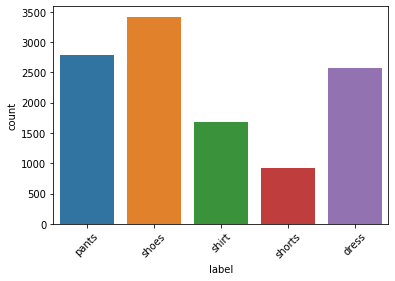

In [ ]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns

# plotting the results of each class in the label column 
sns.countplot(data['label'])
plt.xticks(rotation="45")

# Data Splitting

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

root_dir = '/content/data/dataset'
splitfolders.ratio(root_dir, output = "/content/data/", ratio = (.8, .2))

# Make dictionary storing images for each category train and validation data
# train_dir = os.path.join("/content/data/", "train")
# validation_dir = os.path.join("/content/data/", "val")

Copying files: 11385 files [00:02, 5092.36 files/s]


In [ ]:
train = {}
test = {}

path = "/content/data"

# Make dictionary storing images for each category under train data.
path_train = os.path.join(path, "train")
for i in os.listdir(path_train):
    train[i] = os.listdir(os.path.join(path_train, i))

# Make dictionary storing images for each category under test data.
path_test = os.path.join(path, "val")
for i in os.listdir(path_test):
    test[i] = os.listdir(os.path.join(path_test, i))

## Check values of data splitting

In [ ]:
sum(len(v) for v in train.values())

9106

In [ ]:
 sum(map(len, test.values()))

2279

## Preview image for data splitting

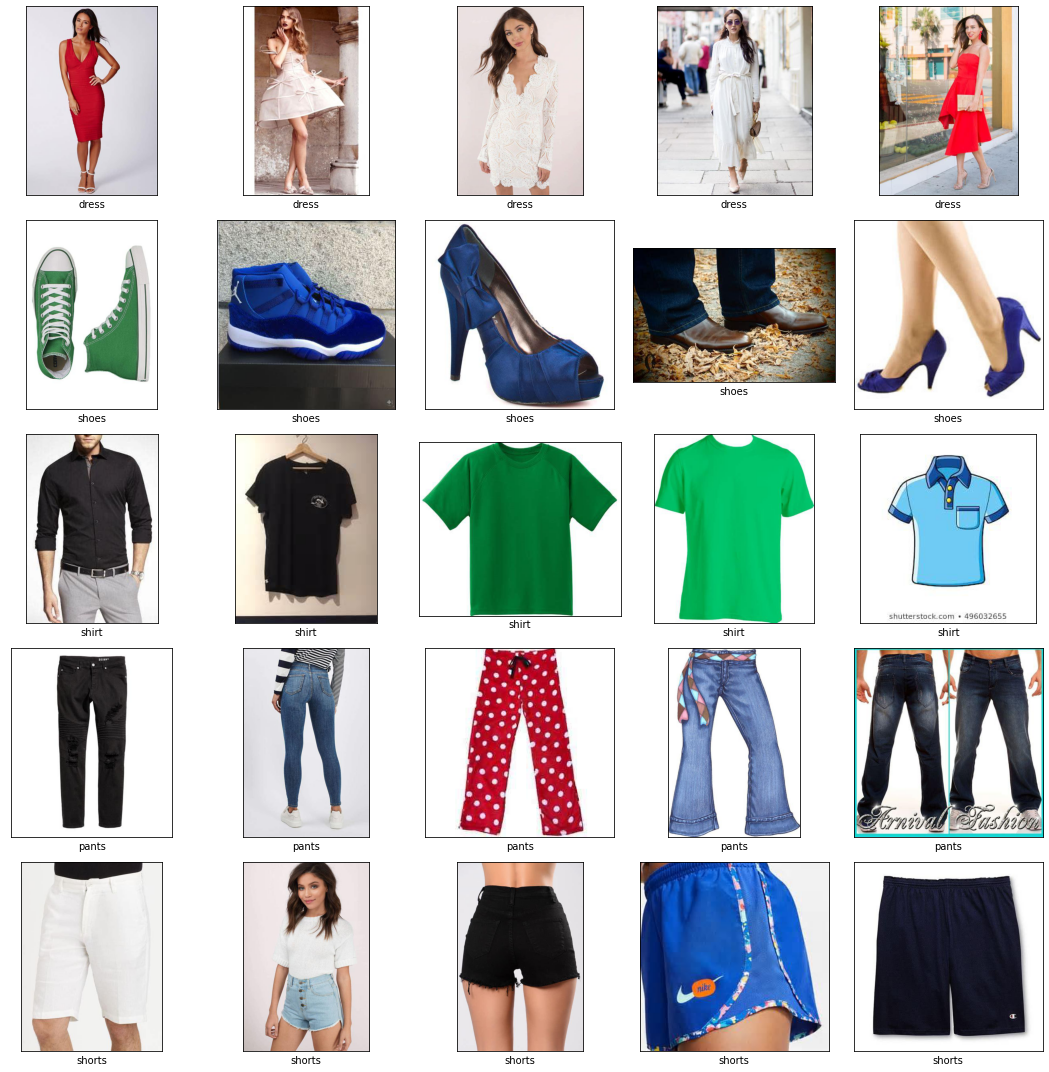

In [ ]:
# import packages
import random
import matplotlib.pyplot as plt
import PIL
from random import sample

# Randomly display 5 images under each of the 6 categories from the training data.
# You will see different images each time.
fig, axs = plt.subplots(len(train.keys()), 5, figsize = (15, 15))
for i, item in enumerate(os.listdir(path_train)):
    images = sample(train[item], 5)
    
    for j, image in enumerate(images):
        img = PIL.Image.open(os.path.join(path_train, item, image))
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel = item, xticks = [], yticks = [])

fig.tight_layout()

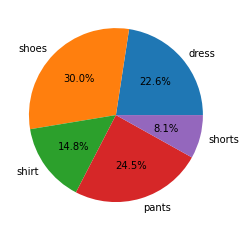

In [ ]:
# Make a pie-chart to visualize the percentage contribution of each category.
# This is often useful when you want your dataset to be balanced.
fig, ax = plt.subplots()
ax.pie(
    [len(train[item]) for item in train],
    labels = train.keys(),
    autopct = "%1.1f%%"
)
fig.show()

# Image Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Create an Image Generator and specify the type of data augmentation you want to apply.
# Here we go with zooming, flipping (horizontally and vertically), and rescaling.
train_aug = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode="nearest"
    )

# For test data we only rescale the data.
# Never augment test data!!!
test_aug = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create a generator for the images. 
# This will make images (including augmented ones) start flowing from the directory to the model.
# Note that augmented images are not stored along with the original images. The process happens in memory.

# Train generator
train_generator = train_aug.flow_from_directory(
        path_train,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        seed=42
        )

# Test generator
test_generator = test_aug.flow_from_directory(
        path_test,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        seed=42
        )

Found 9106 images belonging to 5 classes.
Found 2279 images belonging to 5 classes.


# Modeling

## Use InceptionResNetV2 for Transfer Learning

In [ ]:
# import the necessary packages
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.models import Model, load_model

In [ ]:
# For more information about the pretrained model, click link below:
# https://keras.io/api/applications/

# Load the inception resnetv2 model
basemodel = InceptionResNetV2(
    weights = "imagenet",
    include_top = False, # Classification layer (output layer- sigmoid activations)
    input_shape= (224, 224, 3)
)

219062272/219055592 [==============================] - 8s 0us/step


In [ ]:
basemodel.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [ ]:
# Freeze the basemodel weights, so these weights won't change during training
# mark loaded layers as not trainable
for layer in basemodel.layers:
	layer.trainable = False

# model.trainable = False

In [ ]:
# # Add advanced classification architecture to the model
# model = model.Sequential()
# model.add(basemodel.output)
# model = GlobalAveragePooling2D(name = "Global_Average_Pool")(model)
# model = Flatten(name = "flatten")(model)
# model = Dense(512, activation = "relu", name = "dense_1")(model)
# model = Dropout(0.3)(model)
# model = Dense(256, activation = "relu", name = "dense_2")(model)
# model = Dropout(0.3)(model)
# model = Dense(128, activation = "relu", name = "dense_3")(model)
# model = Dropout(0.3)(model)
# model = Dense(5, activation = "softmax", name = "output")(model)

# model = Model(inputs = basemodel.input, outputs = model)

In [ ]:
# Add advanced classification architecture to the model
model = Sequential()
model.add(basemodel)
model.add(GlobalAveragePooling2D(name = "Global_Average_Pool"))
model.add(Flatten(name = "flatten"))
model.add(Dense(512, activation = "relu", name = "dense_1"))
model.add(Dropout(0.3))
model.add(Dense(256, activation = "relu", name = "dense_2"))
model.add(Dropout(0.3))
model.add(Dense(5, activation = "softmax", name = "output"))
# model = Model(inputs = basemodel.input, outputs = model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
Global_Average_Pool (GlobalA (None, 1536)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               786944    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [ ]:
# Call Back class to stop the Training process of Model if accuracy of training reaches 92%
# callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 92%!")
callbacks = myCallback()

In [ ]:
# Using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(
    monitor = 'loss', 
    verbose = 1, 
    patience = 20
)

# save the best model with lower loss
checkpointer = ModelCheckpoint(
    filepath = "weights.hdf5", 
    verbose = 1, 
    save_best_only = True
)

In [ ]:
# Compile the model
model.compile(
    loss = "categorical_crossentropy",
    optimizer = keras.optimizers.RMSprop(learning_rate = 0.0001),
    metrics = ["accuracy"]
)

In [ ]:
# define batch size
batch_size=32

# Start the training of Neural Network
# fit the neural network model to the data.
history = model.fit(x=train_generator,
            epochs=25,
            validation_data=test_generator,
            validation_freq=1,
            verbose = 1,
            # batch_size = 32,
            steps_per_epoch=len(train_generator)//batch_size,
            validation_steps= len(test_generator)//batch_size,
            callbacks=[callbacks, checkpointer, earlystopping]) # Fit the model passing it the callback we created

Epoch 1/25
8/8 [==============================] - 93s 11s/step - loss: 1.2183 - accuracy: 0.5117 - val_loss: 0.5339 - val_accuracy: 0.8906

Epoch 00001: val_loss improved from inf to 0.53391, saving model to weights.hdf5
Epoch 2/25
8/8 [==============================] - 77s 10s/step - loss: 0.6924 - accuracy: 0.7852 - val_loss: 0.3695 - val_accuracy: 0.9062

Epoch 00002: val_loss improved from 0.53391 to 0.36946, saving model to weights.hdf5
Epoch 3/25
8/8 [==============================] - 77s 10s/step - loss: 0.5645 - accuracy: 0.8281 - val_loss: 0.3213 - val_accuracy: 0.8750

Epoch 00003: val_loss improved from 0.36946 to 0.32133, saving model to weights.hdf5
Epoch 4/25
8/8 [==============================] - 77s 10s/step - loss: 0.4700 - accuracy: 0.8516 - val_loss: 0.2703 - val_accuracy: 0.9375

Epoch 00004: val_loss improved from 0.32133 to 0.27025, saving model to weights.hdf5
Epoch 5/25
8/8 [==============================] - 77s 10s/step - loss: 0.3830 - accuracy: 0.8867 - val_l

# Plot Visualization Accuracy and Loss Each Epoch

In [ ]:
# define function plot visualization training and validation process
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    print("Training Accuracy: %.2f" % acc[-1])
    print("Training Loss: %.2f" % loss[-1])
    print("Validation Accuracy: %.2f" % val_acc[-1])
    print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

    # make a visualization of the results of the neural network between loss, validation loss and accuracy, validation accuracy
    plt.figure(figsize=(15, 5))

    # create visualizations for accuracy values in the training and validation process
    plt.subplot(1, 2, 1)
    plt.plot(acc, 'b', label='Train acc')
    plt.plot(val_acc, 'r', label='Validation acc')
    plt.title('Train and validation accuracy Visualization')
    plt.xlabel("Jumlah Epochs")
    plt.legend()

    # create visualizations for loss values in the training and validation process
    plt.subplot(1, 2, 2)
    plt.plot(loss, 'b', label='Train loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Train and validation loss Visualization')
    plt.legend()

Training Accuracy: 0.94
Training Loss: 0.24
Validation Accuracy: 0.95
Validation Loss: 0.13




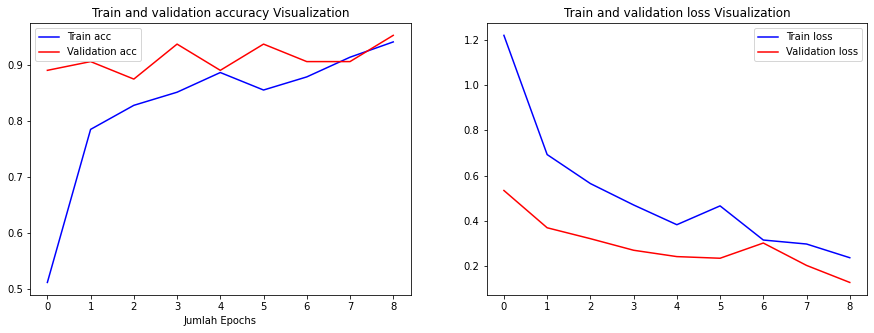

In [ ]:
plot_history(history)

# Predicting Image

In [ ]:
# import the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import re
import requests
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# Assigning label names to the corresponding indexes
labels = {
    0: 'Dress', 
    1: 'Pants', 
    2: 'Shirt', 
    3: 'Shoes', 
    4: 'Shorts'
}

In [ ]:
# Loading images and their predictions 
prediction = []
original = []
image = []
count = 0

path_eval = "/content/data/val"

for i in os.listdir(path_eval):
    for item in os.listdir(os.path.join(path_eval, i)):
        #code to open the image
        img= PIL.Image.open(os.path.join(path_eval, i, item))

        #resizing the image to (256,256)
        img = img.resize((224,224))
        
        #appending image to the image list
        image.append(img)
        
        #converting image to array
        img = np.asarray(img, dtype= np.float32)
        
        #normalizing the image
        img = img / 255
        
        #reshaping the image in to a 4D array
        img = img.reshape(-1,224,224,3)
        
        #making prediction of the model
        predict = model.predict(img)
        
        #getting the index corresponding to the highest value in the prediction
        predict = np.argmax(predict)
        
        #appending the predicted class to the list
        prediction.append(labels[predict])
        
        #appending original class to the list
        original.append(i)

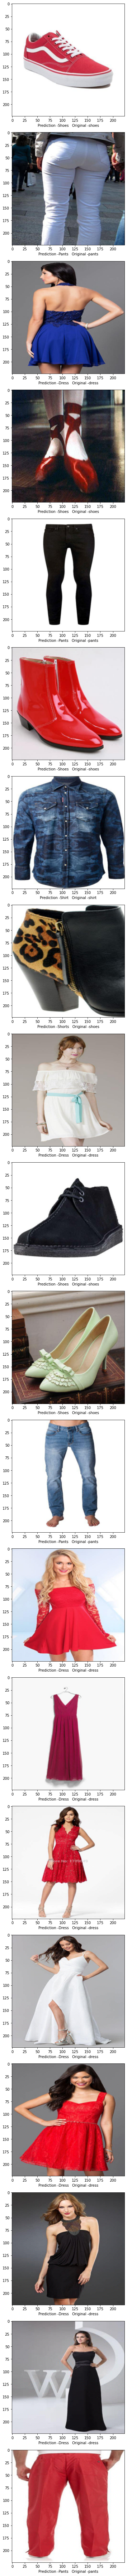

In [ ]:
# Visualizing the results
fig=plt.figure(figsize = (100,100))

for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20,1,i+1)
    plt.xlabel("Prediction -" + prediction[j] +"   Original -" + original[j])
    plt.imshow(image[j])

fig.tight_layout()
plt.show()

# Save the model into TF-Lite format for deployment to mobile application

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpj1tuuym1/assets
